In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('sales_prediction.csv')#loading the data

In [3]:
data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.isnull().sum() #checking on null values 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data.info() #checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
x=data.drop(columns=['Item_Outlet_Sales']) #input
y=data['Item_Outlet_Sales'] #output


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#distributing 30% for testing and 70% for training model

In [9]:
x_train.shape,x_test.shape

((5966, 11), (2557, 11))

In [10]:
x_train_c=x_train.copy() #making copy of data

In [11]:
x_train_c.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1921           FDN08        7.720          Regular         0.147904   
655            NCJ42       19.750          Low Fat         0.014301   
2229           FDY47          NaN          Regular         0.054221   
2537           FDN45       19.350          Low Fat         0.118342   
3528           FDY16       18.350          Regular         0.092150   
...              ...          ...              ...              ...   
5734           FDY08        9.395          Regular         0.286345   
5191           FDC41       15.600          Low Fat         0.117575   
5390           NCQ53       17.600          Low Fat         0.018944   
860            FDL46       20.350          low fat         0.054363   
7270           NCN30       16.350               LF         0.016993   

                  Item_Type  Item_MRP Outlet_Identifier  \
1921  Fruits and Vegetables  116.6466            OUT010 

In [12]:
x_train_c.isnull().sum() # checking null values for training data

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
num_data=x_train_c.select_dtypes(exclude=['object']) #taking only numerical data
num_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.720,0.147904,116.6466,1998
655,19.750,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.350,0.118342,222.6088,2002
3528,18.350,0.092150,184.8266,1987
...,...,...,...,...
5734,9.395,0.286345,139.1838,1998
5191,15.600,0.117575,75.6670,2007
5390,17.600,0.018944,237.3590,2002
860,20.350,0.054363,117.9466,2007


In [14]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [15]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


<AxesSubplot:ylabel='Item_Weight'>

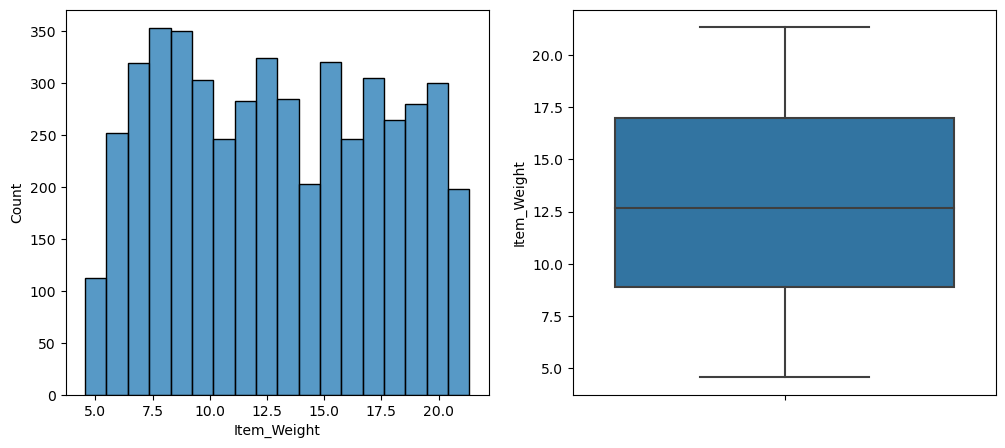

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=x_train_c,x='Item_Weight',ax=ax[0]) # plotting hisplot for item_weight
    
sns.boxplot(data=x_train_c,y='Item_Weight',ax=ax[1]) # plotting boxpot for item_weight

In [17]:
def visualize_num_feature(dataframe,col_name):# we can even build function visualizing plot
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.histplot(data=dataframe,x=col_name,ax=ax[0]);
    sns.boxplot(data=dataframe,y=col_name,ax=ax[1]);
    

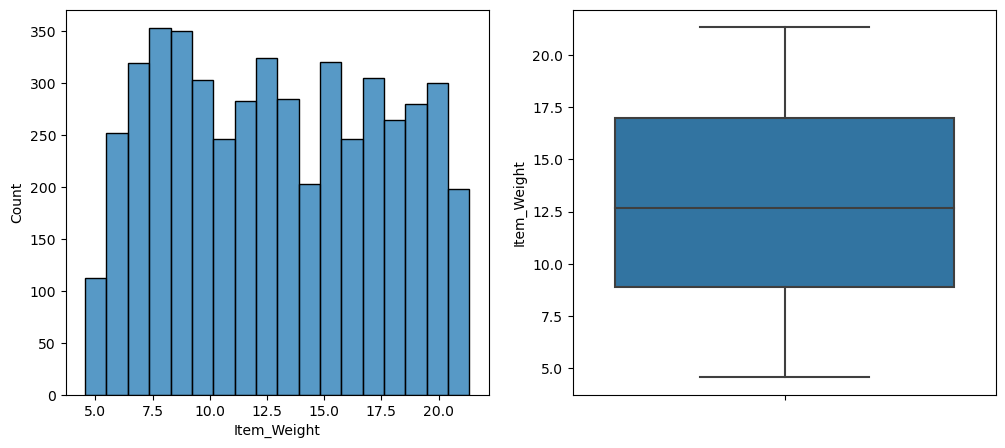

In [18]:
visualize_num_feature(x_train_c,'Item_Weight')

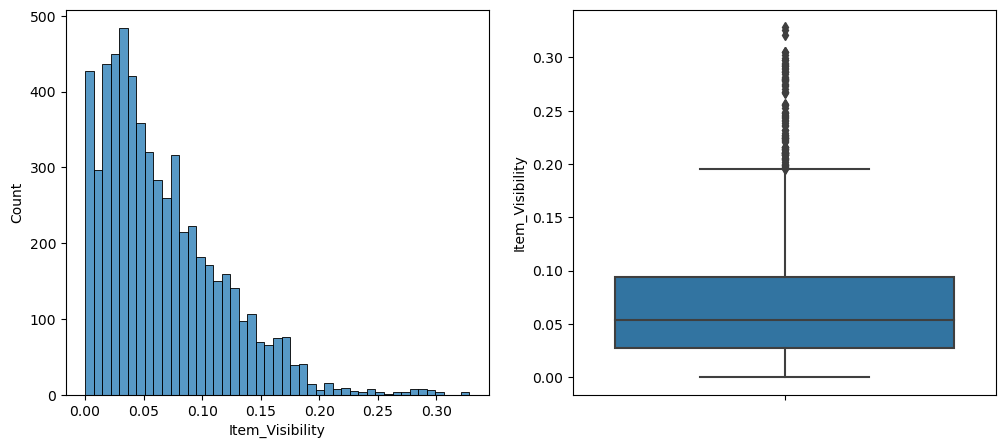

In [19]:
visualize_num_feature(x_train_c,'Item_Visibility')

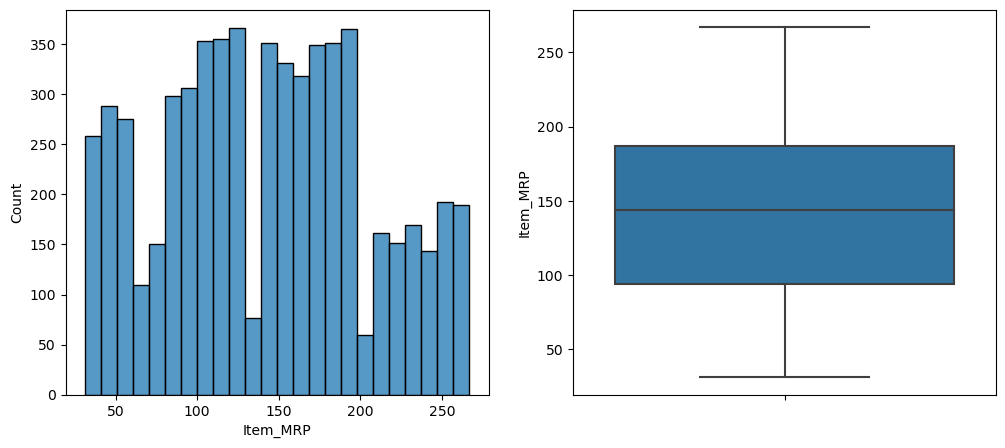

In [20]:
visualize_num_feature(x_train_c,'Item_MRP')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

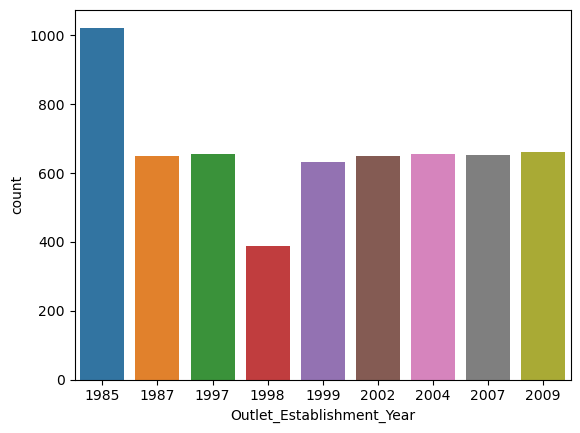

In [21]:
sns.countplot(data=x_train_c,x='Outlet_Establishment_Year')

In [22]:
cat_feature=x_train_c.select_dtypes(include=['object']) # displaying the numerical + text data

In [23]:
cat_feature

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
5734,FDY08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,FDC41,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,NCQ53,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,FDL46,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [24]:
cat_feature.isnull().sum() #checking null values

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [25]:
cat_feature.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [26]:
cat_feature['Item_Identifier'].value_counts() # checking for values of item_identifier

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [27]:
cat_feature['Item_Fat_Content'].value_counts() # checking for values of fat_content

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [28]:
cat_feature['Item_Type'].value_counts() # checking for values of item_type

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [29]:
cat_feature['Outlet_Identifier'].value_counts()  #checking for values of outlets

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [30]:
cat_feature['Outlet_Size'].value_counts() #checking for values of outlet sizes

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [31]:
cat_feature['Outlet_Location_Type'].value_counts() # checking for values of location_type

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

#DATA FEATURING

In [32]:
#1 create high level item types

In [33]:
x_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [34]:
x_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [35]:
#Map  item id into types

In [36]:
def create_item_type(data_frame): # creating a function for new column categorising it as food,non consumables and drink
    data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type']=data_frame['Item_Type'].map({
        'FD':'food',
        'NC':'Non consumable',
        'DR':'Drink'
     })
    return data_frame

In [37]:
x_train_c=create_item_type(x_train_c)
x_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [38]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']) 

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [39]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
3103,Drink,9.600
6330,Drink,20.700
1220,Drink,10.800
4442,Drink,6.960
7801,Drink,17.500
...,...,...
8426,food,7.435
8342,food,17.500
104,food,19.750
3861,food,11.000


# Step2 : fill in missing values for item_weight

In [40]:
#1-USE mapping od id and weight and fill them
#2-if new then use median(weight)



In [41]:
ITEM_ID_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [42]:
x_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index() 

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [43]:
ITEM_TYPE_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING=dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
(ITEM_TYPE_WEIGHT_MAPPING.items())


dict_items([('Drink', 11.8), ('Non consumable', 13.05), ('food', 12.8)])

In [44]:
def item_weight(data_frame): 
    #for finding missing weight using id
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    #for finding missing weight through median
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return data_frame

In [45]:
x_train_c=item_weight(x_train_c)

In [46]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# dealing with outlet size

In [47]:
x_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size() 

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [48]:
from scipy.stats import mode #importing mode

In [49]:
x_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x : mode(x).mode[0])).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\568113945.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x : mode(x).mode[0])).reset_index()
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


,Outlet_Type,Outlet_Size
0,Supermarket Type1,Small
1,Supermarket Type2,Medium
2,Supermarket Type3,Medium


In [50]:
OUTLET_PIVOT_TABLE=x_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x : mode(x).mode[0])).reset_index()
OUTLET_MAPPING=dict(zip(OUTLET_PIVOT_TABLE['Outlet_Type'],OUTLET_PIVOT_TABLE['Outlet_Size']))
OUTLET_MAPPING

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\2273587103.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  OUTLET_PIVOT_TABLE=x_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x : mode(x).mode[0])).reset_index()
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


{'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [51]:
def outlet(data_frame):
    data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_MAPPING))
    return data_frame

In [52]:
outlet(x_train_c).isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  389
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

# Standardize fat content

In [53]:
x_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [54]:
def standardize_fat_content(data_frame):
    
  data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({
    
                             'Low Fat':'Low fat',
                             'Regular':'Regular',
                             'LF':'Low fat',   
                             'low fat':'Low fat',           
                             'reg':'Regular'  })
  return data_frame
                             

In [55]:
x_train_c=standardize_fat_content(x_train_c)

In [56]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low fat              517
                Regular               43
Non consumable  Low fat             1137
food            Low fat             2206
                Regular             2063
dtype: int64

In [57]:
def correct_item_fat(data_frame):
    
  data_frame.loc[data_frame['Item_Type']=='Non consumable','Item_Fat_Content']='Non edible' #converting it into non edible as non consumable cannot be eaten
  return data_frame

In [58]:
x_train_c= correct_item_fat(x_train_c)

In [59]:
x_train_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Non edible,0.014301,Non consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low fat,0.118342,food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low fat,0.117575,food,75.6670,OUT017,2007,Small,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Non edible,0.018944,Non consumable,237.3590,OUT045,2002,Small,Tier 2,Supermarket Type1
860,FDL46,20.350,Low fat,0.054363,food,117.9466,OUT017,2007,Small,Tier 2,Supermarket Type1


In [60]:
def prepare_dataset(data_frame):
    #1 create the item
    data_frame=create_item_type(data_frame)
    
    #2 fill in missing value for weight
    data_frame= item_weight(data_frame)
    
    #3 fill in missing values for outlets
    data_frame=outlet(data_frame)
    
    #4 make item fat content consistent
    data_frame=standardize_fat_content(data_frame)
    
    #5 correct item fat content for non consumables
    data_frame=correct_item_fat(data_frame)
    
    return data_frame

In [61]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [62]:
x_train=prepare_dataset(x_train)
x_train.isnull().sum()


Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  389
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [63]:
x_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [64]:
x_test=prepare_dataset(x_test)
x_test.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  166
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [65]:
cat_features=x_train.select_dtypes(include=['object'])

In [66]:
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,food,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Non edible,Non consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low fat,food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,food,OUT013,High,Tier 3,Supermarket Type1


In [67]:
from sklearn.preprocessing import OneHotEncoder


In [68]:
ohe=OneHotEncoder(handle_unknown='ignore')

In [69]:
ohe.fit(cat_features)

OneHotEncoder(handle_unknown='ignore')

In [70]:
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_features.columns)


In [71]:
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [72]:
num_features_train=x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_features_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [73]:
cat_features_train=x_train.select_dtypes(include=['object'])
x_train_cat_ohe=pd.DataFrame(ohe.transform(cat_features_train).toarray(),columns=ohe_feature_names)
x_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [74]:
x_train_final=pd.concat([num_features_train,x_train_cat_ohe],axis=1)
x_train_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [75]:
final_columns=x_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

nums_feats_test=x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cats_feats_test=x_test.select_dtypes(include=['object'])
x_test_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_features_names)
x_test_final=pd.concat([nums_feats_test,x_test_cat_ohe],axis=1)
x_test_final=x_test_final[final_columns]

x_test_final.head()

In [76]:
nums_feats_test=x_test.select_dtypes(exclude=['object']).reset_index(drop=True) 

In [77]:
 cats_feats_test=x_test.select_dtypes(include=['object'])

In [78]:
x_test_cat_ohe=pd.DataFrame(ohe.transform(cats_feats_test).toarray(),columns=ohe_feature_names) 
x_test_final=pd.concat([nums_feats_test,x_test_cat_ohe],axis=1)
x_test_final=x_test_final[final_columns]
x_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#modelling

In [79]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np


In [80]:
def train_and_eval_model(model,x_train,y_train,cv=5):
    cv_results=cross_validate(model,x_train,y_train,cv=cv,scoring=('r2','neg_root_mean_squared_error'),)
    print('Model:',model)
    r2_scores=cv_results['test_r2']
    print('R2 CV scores:',r2_scores)
    print('R2 CV scores mean/stdev:',np.mean(r2_scores),'/',np.std(r2_scores))
    
    rmse_scores=cv_results['test_neg_root_mean_squared_error']
    rmse_scores=[-1*score for score in rmse_scores]
    print('RMSE CV scores:',rmse_scores)
    print('RMSE CV scores mean/stdev:',np.mean(rmse_scores),'/',np.std(rmse_scores))

In [81]:
rf=RandomForestRegressor(random_state=42)
train_and_eval_model(model=rf,x_train=x_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.56934903 0.5278571  0.54243354 0.55593112 0.52073666]
R2 CV scores mean/stdev: 0.5432614916688161 / 0.017812512055183048
RMSE CV scores: [1105.6835848228345, 1167.1851469022556, 1181.0916693143954, 1152.2130571466091, 1201.3827541800028]
RMSE CV scores mean/stdev: 1161.5112424732195 / 32.27540042085681


In [82]:
gb=GradientBoostingRegressor(random_state=42)
train_and_eval_model(model=gb,x_train=x_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60628119 0.59282509 0.57462687 0.60644965 0.550202  ]
R2 CV scores mean/stdev: 0.5860769601971088 / 0.021386500235066327
RMSE CV scores: [1057.2099254756704, 1083.910759749742, 1138.7844787760619, 1084.6953374457166, 1163.8661836170825]
RMSE CV scores mean/stdev: 1105.6933370128547 / 39.357697080903165


In [83]:
hgb=HistGradientBoostingRegressor(random_state=42)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58710728 0.55231316 0.55228752 0.5839508  0.54135403]
R2 CV scores mean/stdev: 0.563402558007391 / 0.018529975887124798
RMSE CV scores: [1082.646710796542, 1136.5542916940942, 1168.304674850057, 1115.2698774261178, 1175.2576259262084]
RMSE CV scores mean/stdev: 1135.606636138604 / 34.236232926333756


In [84]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
train_and_eval_model(model=xgr,x_train=x_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57730972 0.55876766 0.54421335 0.58393553 0.52339929]
R2 CV scores mean/stdev: 0.5575251106113133 / 0.02205565461492861
RMSE CV scores: [1095.416494682338, 1128.3314423522838, 1178.7923651707856, 1115.290340217991, 1198.04086346707

# Handling categoical data  
 # All categorical column - native handling

In [85]:
x_train_copy=x_train.copy().drop(columns='Item_Identifier')

cat_cols=x_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols=cal_cols=x_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols,num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [86]:
x_train_copy[cat_cols]=x_train_copy[cat_cols].astype('category')
n_categorical_features=len(cat_cols)
n_numerical_features=len(num_cols)
x_train_copy=x_train_copy[cat_cols+num_cols]

x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5577 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [87]:
categorical_mask=[True] * n_categorical_features + [False]*n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [88]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask=[True] * n_categorical_features + [False]*n_numerical_features

ordinal_encoder=make_column_transformer(
  (
     OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),
     make_column_selector(dtype_include="category"),
  ),
  remainder='passthrough',  

)

hgb=make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
      random_state=42,categorical_features=categorical_mask),
    
)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020B41810DC0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                     

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 256, in fit
    self.is_categorical_, know

# no item identifier

In [89]:
x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,food,OUT010,NaN,Tier 3,Grocery Store
655,Non edible,Non consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low fat,food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,food,OUT013,High,Tier 3,Supermarket Type1


In [90]:
cats=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cats)
ohe_feature_names=ohe.get_feature_names_out(input_features=cats.columns)

In [91]:
num_feat_train=x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cats_train=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_train_cat_ohe=pd.DataFrame(ohe.transform(cats_train).toarray(),columns=ohe_feature_names)
x_train_final=pd.concat([num_feat_train,x_train_cat_ohe],axis=1)

In [92]:
x_train_final

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low fat,Item_Fat_Content_Non edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Non consumable,Item_Type_food,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.720,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.750,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.600,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.350,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.350,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,9.395,0.286345,139.1838,1998,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5962,15.600,0.117575,75.6670,2007,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5963,17.600,0.018944,237.3590,2002,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5964,20.350,0.054363,117.9466,2007,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [93]:
rf=RandomForestRegressor(random_state=42)
train_and_eval_model(model=rf,x_train=x_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.56292024 0.52664584 0.5379264  0.55804142 0.53942491]
R2 CV scores mean/stdev: 0.5449917617989529 / 0.013484849237469879
RMSE CV scores: [1113.905880815174, 1168.6813654239456, 1186.8944367648292, 1149.4720304204818, 1177.726677482206]
RMSE CV scores mean/stdev: 1159.3360781813274 / 25.86972723112975


In [94]:
gb=GradientBoostingRegressor(random_state=42)
train_and_eval_model(model=gb,x_train=x_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60274267 0.58459614 0.57802329 0.61918214 0.56408077]
R2 CV scores mean/stdev: 0.5897250028571588 / 0.019277161641044416
RMSE CV scores: [1061.950092989767, 1094.808810371589, 1134.2290297479462, 1067.0045615974425, 1145.769618456046]
RMSE CV scores mean/stdev: 1100.7524226325581 / 34.13823832780581
